# Linear Regression: Training, Testing, and Predicting
## Sources: 
1. <a href="https://pythonprogramming.net/training-testing-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Training and Testing</a>
2. <a href="https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Forecasting and Predicting</a>

In the previous notebooks, we learned what linear regression is, what features and labels are, and why as well as how to scale the features.  In this notebook, we will train and test our data, then use it to predict future prices.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Raise errors instead of give warnings
pd.set_option("mode.chained_assignment", "raise")

In [3]:
# Import data
import os
data_file_path = os.path.join("Data","stock_data.csv")

stock_data = pd.read_csv(data_file_path, index_col="Date")
display(stock_data.head())
display(stock_data.tail())

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.818025,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.707965,-5.353887,2940957.0,NaN


In [4]:
# Define features
X = np.array(stock_data.drop(["Forecast"], 1))

# Define labels
y = np.array(stock_data["Forecast"])

In [5]:
# Scale the features
X = preprocessing.scale(X)

### Note!

Recall that we engineered the labels column—or the Forecast column—by shifting the values in the Adj. Close column up 172 values.  This would mean that the last 172 rows in the Forecast column have no value.  We will show this more clearly by looking at the last 174 rows of the dataframe.

In [6]:
# Define the number of days out we want to forecast
# In this case, want to forecast out 5% of the dataframe
import math
forecast_out = math.ceil(0.05*len(stock_data))

# Preview last 174 columns of data
display(stock_data.tail((forecast_out+2)))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-07-18,986.95,1.935106,1.396195,1398920.0,942.02
2017-07-19,992.77,0.870305,0.278785,1392709.0,949.89
2017-07-20,992.19,1.427962,-0.482447,1410290.0,941.41
2017-07-21,993.84,1.111597,0.489383,1412108.0,943.29
2017-07-24,998.31,1.607355,0.423499,3053176.0,946.65
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN


Therefore, we must also adjust our features $X$ and labels $y$ such that it excludes the last 172 values.  We cannot train a linear regression model with missing labels.

In [7]:
# Only include values up until the row before the Forecast values become null
# or rather, exclude the last 5% of values
# Recall that when specifying a range,
# Python excludes the last value
X_known = X[:-forecast_out]
y_known = y[:-forecast_out]

In [8]:
# Confirm features and labels are the same length
length_of_features = len(X)
length_of_labels = len(y)

print(f"Length of features: {length_of_features}")
print(f"Length of labels: {length_of_labels}")

Length of features: 3424
Length of labels: 3424


### Training and Testing

When building a machine learning model, you will usually split your data into training and testing sets.  The training set is passed into the classifier so that it can build the equation used to make predictions (recall that the equal for a line is: $y=mx+b$).  The testing set can then be used to measure the accuracy of the classifier.

Note that there are three different groups of data — the known data we train with, the known data with test with, then any future data we don't know the label of yet.  In the training and testing sets, we know both the features and the labels.  With the training set, we use both the features and the labels to build the model.  With the testing set, we pass the features in, and compare the model's predicted labels to the actual labels, in order to evaluate how accurate the model is.  We can then use existing data apart from the training or testing data to predict future labels, or in general, future values.

In [9]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2)

# Define which classification algorithm we are using
classifier = LinearRegression()

# Fit- or train- the classifier
classifier.fit(X_train, y_train)

# Print the score—or accuracy—of the classifier
print(classifier.score(X_test, y_test))

0.9746898660105399


We tested our model and got a score of 92% accuracy.  Whether or not this is good is subjective, and varies with each project.  What it means in our case it that we can predict future prices, and we can be 92% sure that our prediction is valid.

### Predicting

We are now ready to forecast out into the future.  Recall that earlier we defined X_known and y_known as the features and labels only up to the point where we still knew the label.  For the last 172 records, we do not know the label — these are the values we actually want to predict.  We do have features for these last 172 records though; so we may pass these into our linear regression model to calculate the label value.  We will therefore define X_forecast as the opposite of X_known — everything after the point where we still knew the label.

In [10]:
# Define what we want to forecast
# Recall that X_known is defined as: X_known = X[:-forecast_out]
# We will therefore forecast out using "the rest" of the features
X_forecast = X[-forecast_out:]

In [11]:
# Make prediction
forecast = classifier.predict(X_forecast)

# Preview forecasted values
print(forecast)

[1005.56784476 1007.9382885  1011.24038915  981.02456632  978.28345662
  962.27989399  971.77204321  957.42248695  960.5720294   960.51559775
  953.94226741  960.13567944  960.15255159  958.10135883  954.0940044
  936.01392185  943.90869136  953.34768112  952.45018383  958.35942799
  940.1096927   940.35884732  934.63102686  954.03312968  956.79850698
  949.90911384  944.06145481  942.16145504  949.29037954  957.75265809
  969.32867377  966.08521793  954.47104993  955.65156313  963.79356614
  955.07037553  956.89184264  960.55082961  964.9099178   953.8527109
  948.75211723  943.24053706  950.81171666  961.38008403  961.08204852
  957.42610117  947.17365807  951.4209166   972.58746357  979.05540373
  987.84598182  980.43137447  986.38194093  980.88994412  998.8646927
 1007.48743799 1006.45022381 1000.89323364 1019.10025257 1019.68170992
 1022.17955938 1023.46657456 1025.5133636  1026.80691988 1015.67918355
 1019.40011541  997.29444677 1002.32234625 1004.91387974 1004.34806689
 1043.602

The values printed above are the predicted values for the next $a$ days, where $a$ is 5% of the length of the dataframe, as defined earlier.  Using Linear Regression, we have forecasted out future stock prices.

Recall that the last $a$ rows of the Forecast column in our stock_data dataframe are NaN values, where $a$ is 5% of the length of the dataframe.

In [12]:
display(stock_data.tail(forecast_out+2))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-07-18,986.95,1.935106,1.396195,1398920.0,942.02
2017-07-19,992.77,0.870305,0.278785,1392709.0,949.89
2017-07-20,992.19,1.427962,-0.482447,1410290.0,941.41
2017-07-21,993.84,1.111597,0.489383,1412108.0,943.29
2017-07-24,998.31,1.607355,0.423499,3053176.0,946.65
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,NaN


  We will therefore fill these values in with our forecast predictions.

In [13]:
# Fill in NaN values with forecast array
stock_data["Forecast"][-forecast_out:] = forecast
display(stock_data.tail(forecast_out+2))

,Adj. Close,High_Low_Volatility_Percent,Daily_Percent_Change,Adj. Volume,Forecast
Date,,,,,
2017-07-18,986.95,1.935106,1.396195,1398920.0,942.020000
2017-07-19,992.77,0.870305,0.278785,1392709.0,949.890000
2017-07-20,992.19,1.427962,-0.482447,1410290.0,1005.567845
2017-07-21,993.84,1.111597,0.489383,1412108.0,1007.938288
2017-07-24,998.31,1.607355,0.423499,3053176.0,1011.240389
...,...,...,...,...,...
2018-03-21,1094.00,1.976619,0.130884,1990515.0,1106.876143
2018-03-22,1053.15,3.265882,-2.487014,3418154.0,1063.045263
2018-03-23,1026.55,4.089299,-2.360729,2413517.0,1035.902696


### Visualizing Forecast

Our data now has forecasted values; we have achieved our goal.  We could stop here; however, we will visualize our data to better see what is happening.  Depending on your use case, this may not always be necessary.

In [14]:
# Import datetime to work with date values
from datetime import datetime

# Get the date from the last row
last_date = stock_data.iloc[-1].name

# Convert the last date to unix
last_date_unix = int(datetime.strptime(last_date, "%Y-%m-%d").timestamp())

# Define a day's length in seconds, for working in unix
unix_day = 60 * 60 * 24

# Fill the Forecast column with NaN values.
# we will fill the end of this back in shortly the values in our forecast array.
stock_data["Forecast"] = np.nan

# Define the next day as unix value.
# We will add new rows to our dataframe and use this as the index.
next_unix = last_date_unix + unix_day

# For each predictedd price in our forecast array:
for prediction in forecast:
    # Format the date as a string; we will use this to define the index
    next_date = str(datetime.fromtimestamp(next_unix).date())
    
    # Add a new row to the dataframe; use the next_date value as the index.
    # For all columns except the last, replace the current value with Nan.
    # Define the "Forecast" field as the predicted stock price.
    stock_data.loc[next_date] = [np.nan for _ in range(len(stock_data.columns) -1)] + [prediction]
    
    # Increase the unix date by unix day
    next_unix += unix_day

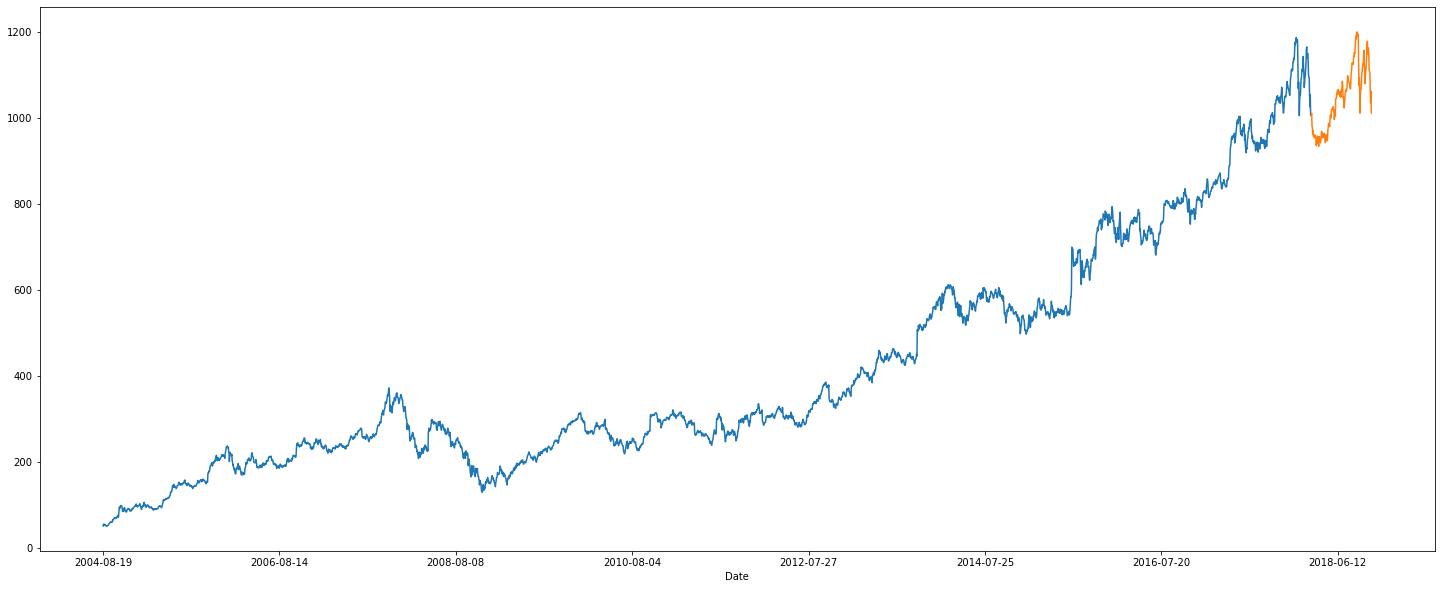

In [15]:
import matplotlib.pyplot as plt

# Create plot figure
figure_length = 25
figure_height = 10
_ = plt.figure(figsize=(figure_length,figure_height))

# Plot known and forecasted adjusted close prices.
_ = stock_data["Adj. Close"].plot()
_ = stock_data["Forecast"].plot()
plt.show()